# Your first deep neural network

In [15]:
import tensorflow as tf
tf.__version__

'2.5.0'

# imports

In [16]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.datasets import cifar10

# data

In [17]:
NUM_CLASSES = 10

In [18]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [19]:
x_train.shape

(50000, 32, 32, 3)

In [20]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [21]:
y_train.shape

(50000, 1)

In [22]:
y_train[0]

array([6], dtype=uint8)

In [23]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [24]:
x_train[54, 12, 13, 1] 

0.36862746

In [25]:
x_train[54, 12, 13]

array([0.2627451 , 0.36862746, 0.16470589], dtype=float32)

# architecture

In [26]:
input_layer = Input((32,32,3))

x = Flatten()(input_layer)

x = Dense(200, activation = 'relu')(x)
x = Dense(150, activation = 'relu')(x)

output_layer = Dense(NUM_CLASSES, activation = 'softmax')(x)

model = Model(input_layer, output_layer)

In [42]:
model

In [27]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 200)               614600    
_________________________________________________________________
dense_1 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


# train

In [28]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [33]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=100
          , shuffle=True)

Epoch 1/100
1563/1563 [==============================] - 3s 2ms/step - loss: 1.3606 - accuracy: 0.5160
Epoch 2/100
1563/1563 [==============================] - 3s 2ms/step - loss: 1.3467 - accuracy: 0.5197
Epoch 3/100
1563/1563 [==============================] - 3s 2ms/step - loss: 1.3247 - accuracy: 0.5283
Epoch 4/100
1563/1563 [==============================] - 3s 2ms/step - loss: 1.3072 - accuracy: 0.5341
Epoch 5/100
1563/1563 [==============================] - 3s 2ms/step - loss: 1.2997 - accuracy: 0.5381
Epoch 6/100
1563/1563 [==============================] - 3s 2ms/step - loss: 1.2822 - accuracy: 0.5411
Epoch 7/100
1563/1563 [==============================] - 3s 2ms/step - loss: 1.2705 - accuracy: 0.5460
Epoch 8/100
1563/1563 [==============================] - 3s 2ms/step - loss: 1.2630 - accuracy: 0.5466
Epoch 9/100
1563/1563 [==============================] - 3s 2ms/step - loss: 1.2522 - accuracy: 0.5522
Epoch 10/100
1563/1563 [==============================] - 3s 2ms/step - l

1563/1563 [==============================] - 3s 2ms/step - loss: 0.9139 - accuracy: 0.6729
Epoch 80/100
1563/1563 [==============================] - 3s 2ms/step - loss: 0.9070 - accuracy: 0.6743
Epoch 81/100
1563/1563 [==============================] - 3s 2ms/step - loss: 0.9060 - accuracy: 0.6732
Epoch 82/100
1563/1563 [==============================] - 3s 2ms/step - loss: 0.9024 - accuracy: 0.6743
Epoch 83/100
1563/1563 [==============================] - 3s 2ms/step - loss: 0.9023 - accuracy: 0.6742
Epoch 84/100
1563/1563 [==============================] - 3s 2ms/step - loss: 0.8955 - accuracy: 0.6784
Epoch 85/100
1563/1563 [==============================] - 4s 2ms/step - loss: 0.8953 - accuracy: 0.6778
Epoch 86/100
1563/1563 [==============================] - 3s 2ms/step - loss: 0.8944 - accuracy: 0.6784
Epoch 87/100
1563/1563 [==============================] - 3s 2ms/step - loss: 0.8977 - accuracy: 0.6761
Epoch 88/100
1563/1563 [==============================] - 3s 2ms/step - loss:

# analysis

In [34]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 1.7489 - accuracy: 0.4896


[1.7489384412765503, 0.4896000027656555]

In [35]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

In [44]:
preds.shape

(10000, 10)

In [45]:
preds[0]

array([3.3808651e-03, 1.6107166e-02, 2.0123818e-03, 3.8203833e-01,
       1.4008039e-01, 3.5386625e-01, 1.5500109e-04, 4.5269232e-02,
       5.4077875e-02, 3.0125247e-03], dtype=float32)

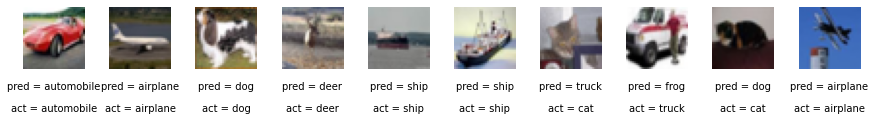

In [41]:

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)
